In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from skimage.transform import resize
import CA_model
import iceing
import evaluation
import initial_distributions
from tqdm import tqdm

In [8]:
# make a color map of fixed colors
cmap = colors.ListedColormap(['cyan', 'white', 'blue'])
bounds=[-100,0.5,3,100]
norm = colors.BoundaryNorm(bounds, cmap.N)

## CA model

In [2]:
# size = 1000

# Ht_0 = np.random.normal(loc = 0.15, scale = 0.1, size = (int(size/3), int(size/3)))
# Ht_0 = resize(Ht_0, (size, size))
# Ht_0 = np.heaviside(Ht_0, 0) * Ht_0 + 0.1

# # Ht_0 = np.random.normal(loc = 0.15, scale = 0.1, size = (size, size))
# h = np.zeros(shape = (size, size))


In [3]:
# initialize model with 'snow dune topography' Popovic et al., 2020

res = 200                       # size of the domain
mode = 'snow_dune'              # topography type
tmax = 2; dt = 0.1              # diffusion time and time-step if mode = 'diffusion' or mode = 'rayleigh'
g = 1                           # anisotropy parameter
sigma_h = 0.03                  # surface standard deviation
snow_dune_radius = 1.           # mean snow dune radius if mode = 'snow_dune'  
Gaussians_per_pixel = 0.2       # density of snow dunes if mode = 'snow_dune'  
snow_dune_height_exponent = 1.  # exponent that relates snow dune radius and snow dune height if mode = 'snow_dune'

mean_freeboard = 0.1

Tdrain = 10.; dt_drain = 0.5    # time and time-step of to drainage

# create topography
Ht_0 = initial_distributions.Create_Initial_Topography(res = res, mode = mode, tmax = tmax, dt = dt, g = g, sigma_h = sigma_h, h = mean_freeboard, snow_dune_radius = snow_dune_radius, 
            Gaussians_per_pixel = Gaussians_per_pixel, number_of_r_bins = 150, window_size = 5, snow_dune_height_exponent = snow_dune_height_exponent)


size = res
h = np.zeros(shape = (size, size))

/Users/nik/opt/miniconda3/envs/IntroCLS/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nik/opt/miniconda3/envs/IntroCLS/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


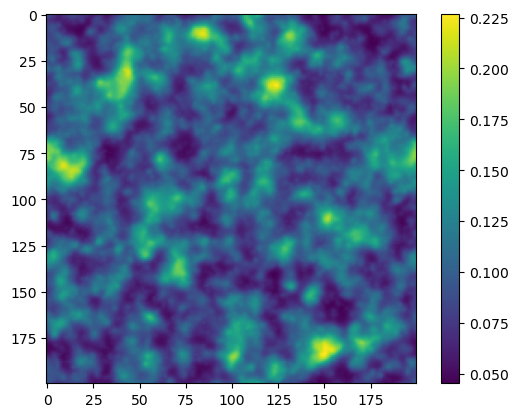

In [4]:
plt.imshow(Ht_0)
plt.colorbar()

In [5]:
ca_model = CA_model.CA_model(Ht_0, h, dt = 15, dx = 1, periodic_bounds=False)
#ca_model.H[ca_model.psi == ca_model.psi.min()] = 0
hs = []
Hs = []
Hts = []

In [6]:
iterations = 2500

pbar = tqdm(total=100)
for _ in tqdm(range(40), leave=False):
    h, H, Ht = ca_model.run(iterations)
    hs.append(h)
    Hs.append(H)
    Hts.append(Hts)

  0%|          | 0/40 [00:00<?, ?it/s]

In [7]:
for i, h in enumerate(hs):
    plt.imshow(np.ma.masked_where(h<=0.01, h))
    plt.colorbar()
    #plt.imshow(h)
    plt.savefig('test_figs/h_'+str(i*iterations)+'.png')
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [10]:
ca_model.roll_idx[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [11]:
ca_model.roll_idx[1]

array([199,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

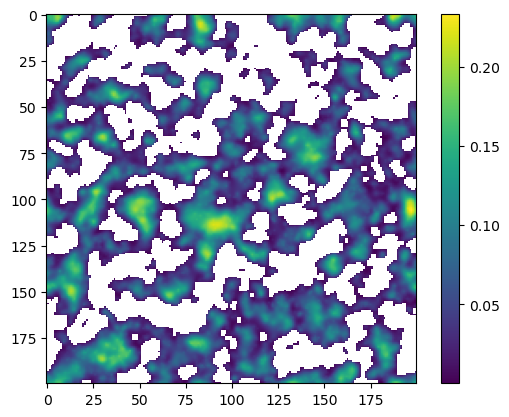

In [73]:
plt.imshow(np.ma.masked_where(H<=0, H))
#plt.imshow(H)
plt.colorbar()

## Evaluation CA

In [33]:
areas_ca, perimeters_ca = evaluation.perim_area(np.where(h>0.01, -1, 1), pond_val = -1, ice_val = 1)

Text(0, 0.5, 'perimeter [m]')

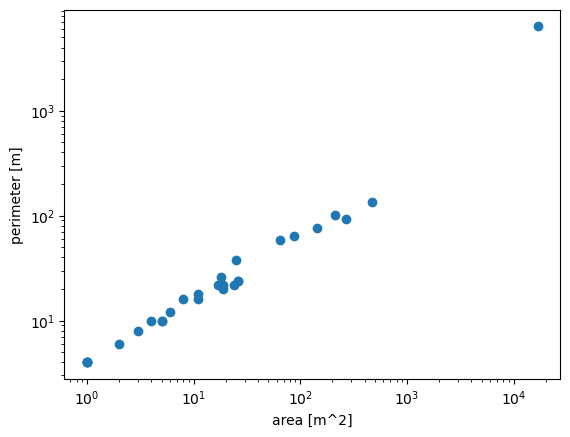

In [34]:
plt.scatter(areas_ca, perimeters_ca)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('area [m^2]')
plt.ylabel('perimeter [m]')

## Ising model

In [2]:
iceing_test = iceing.iceing_model(0.45, 1000)

In [3]:
ponds, sums = iceing_test.run(15_000_000)

In [4]:
# make a color map of fixed colors
cmap = colors.ListedColormap(['blue', 'white'])
bounds=[-100,0,100]
norm = colors.BoundaryNorm(bounds, cmap.N)

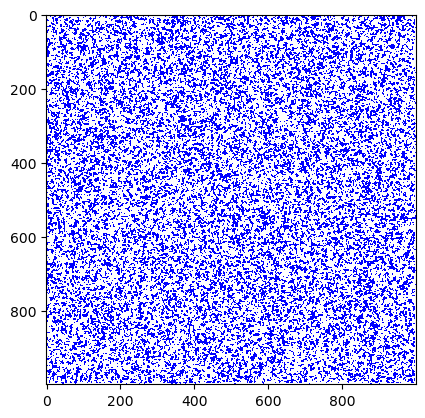

In [5]:
# plot ponds
plt.imshow(ponds, cmap=cmap, norm=norm)

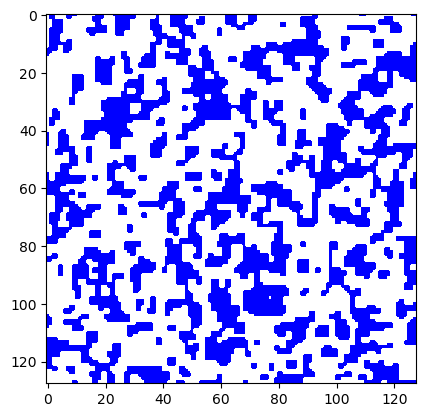

In [6]:
# zoom in
plt.imshow(ponds[100:228,100:228], cmap=cmap, norm=norm)

## Evaluation Ising
Fractal dimension plot is still missing.

In [7]:
areas_ising, perimeters_ising = evaluation.perim_area(ponds, pond_val = -1, ice_val = 1)

Text(0, 0.5, 'perimeter [m]')

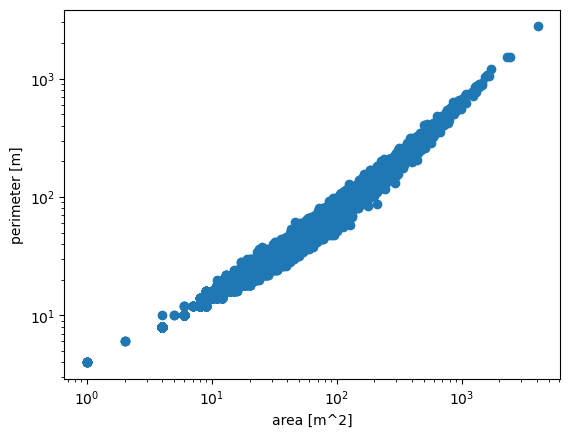

In [8]:
plt.scatter(areas_ising, perimeters_ising)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('area [m^2]')
plt.ylabel('perimeter [m]')

In [9]:
areas_dim, dimensions = evaluation.fractal_dim(ponds, -1, 1, 150)

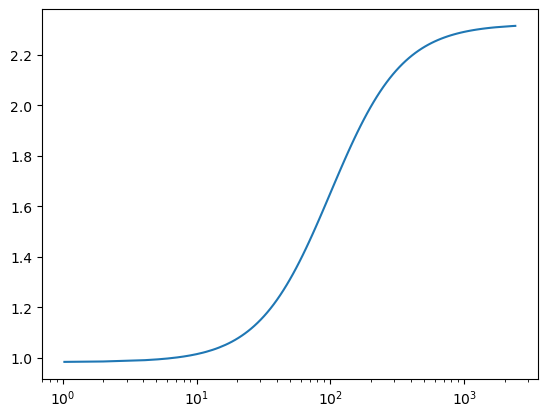

In [11]:
plt.plot(areas_dim, dimensions)
plt.xscale('log')

## For fun
Just a normal distribution with the heaviside function.

In [26]:
size = 1000
h_norm = np.random.normal(loc = 0.5, scale = 1, size = (int(size/3), int(size/3)))
h_norm = resize(h_norm, (size, size))
h_norm = np.heaviside(h_norm-0.6, 0) * h_norm

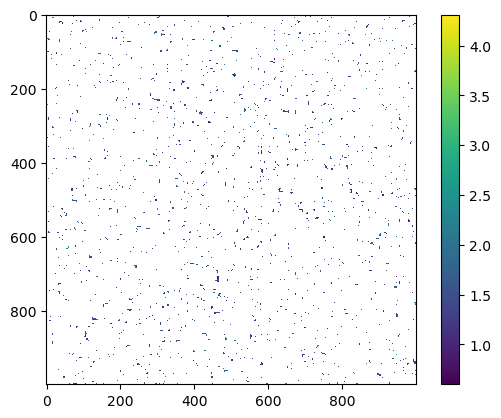

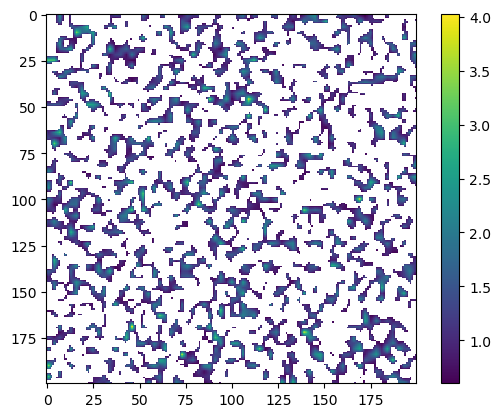

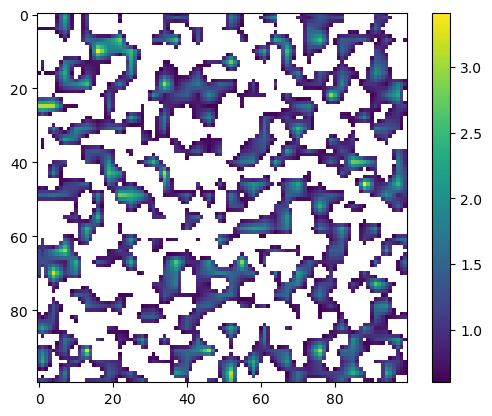

In [27]:
plt.figure()
plt.imshow(np.ma.masked_where(h_norm<=0, h_norm))
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(np.ma.masked_where(h_norm[:200, :200]<=0, h_norm[:200, :200]))
plt.colorbar()
plt.show()
plt.imshow(np.ma.masked_where(h_norm[:100, :100]<=0, h_norm[:100, :100]))
plt.colorbar()
plt.show()

In [30]:
areas_norm, perimeters_norm = evaluation.perim_area(np.where(h_norm>0, -1, 1), pond_val = -1, ice_val = 1)

Text(0, 0.5, 'perimeter [m]')

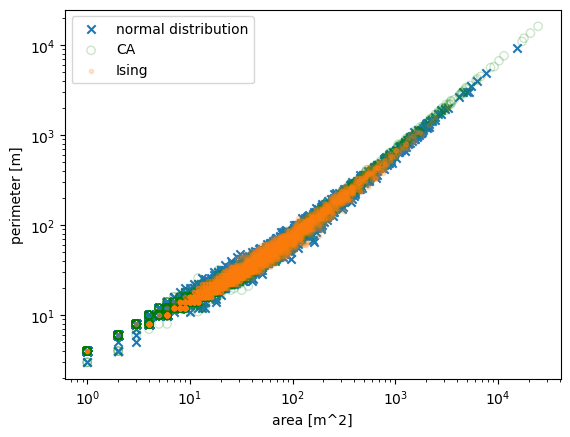

In [36]:
plt.scatter(areas_norm, perimeters_norm, marker='x', label = 'normal distribution')
plt.scatter(areas_ca, perimeters_ca, facecolor='none', edgecolors='g', alpha=0.2, label = 'CA')
plt.scatter(areas_ising, perimeters_ising, marker='.', alpha=0.2, label = 'Ising')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('area [m^2]')
plt.ylabel('perimeter [m]')